In [43]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
from scipy import stats

In [44]:
path = r"input_files/spotify/*.csv"                # The path requires "".csv" at end of file name. 
                                                                 # This is to prevent the program from blowing up
                                                                 # when it hits some kind of hidden file. 

countries_spotify_df = pd.read_csv(glob.glob(path)[0], header=0)           # Sets up main dataframe with data from FIRST file
string = str(glob.glob(path)[0])                                 # in the folder.
country_name, = re.findall(r"/spotify/(.*)_tracks", string)   # This line extracts the year and month from the 
countries_spotify_df[['Country']] = country_name

for file in glob.glob(path)[1:]:                                 # Now that you have the dataframe set up from the 
        temp_df = pd.read_csv(file, header=0)                    # first file in the folder, this iterates through 
        string = str(file)                                       # remaining files
        country_name, = re.findall(r"/spotify/(.*)_tracks", string)
        temp_df[['Country']] = country_name
        #print (country_name)
        countries_spotify_df = pd.concat([countries_spotify_df,        # Adds temperary datafame to end of main dataframe
                                       temp_df])                 # as new rows.       
                                                 

countries_spotify_df                                                # You should get 4,800 rows (24 months x 200 
                                                                 # tracks per month)

,Position,Track Name,Artist,Streams,URL,Year,Month,Track ID,Danceability,Energy,Valence,Stream %,Danceability_Stream%,Valence_Stream%,Energy_Stream%,Country,yyyy-mm,Tempo,Tempo_Stream%
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,1,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,0.327,0.001410,0.001097,0.000461,0.000447,Global,NaN,NaN,NaN
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,0.913,0.000975,0.000741,0.000890,0.000467,Global,NaN,NaN,NaN
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,1,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,0.388,0.000866,0.000718,0.000336,0.000467,Global,NaN,NaN,NaN
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,1,7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,0.662,0.000703,0.000638,0.000465,0.000470,Global,NaN,NaN,NaN
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,1,7DnAm9FOTWE3cUvso43HhI,0.720,0.706,0.620,0.000692,0.000498,0.000429,0.000488,Global,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,196,"Tujhe Kitna Chahein Aur (Film Version) [From ""...",Jubin Nautiyal,272866,https://open.spotify.com/track/3lT4SlZVvqLhMei...,2020,12,3lT4SlZVvqLhMeiuBv7gHW,0.358,0.252,0.284,0.000252,0.000090,0.000072,0.000063,India,NaN,NaN,NaN
4746,197,Mera Bhai,DIVINE,272385,https://open.spotify.com/track/3v3FEONiwvufayP...,2020,12,3v3FEONiwvufayPNcWzHhc,0.663,0.810,0.464,0.000251,0.000167,0.000117,0.000204,India,NaN,NaN,NaN
4747,198,Fallin for You,Shrey Singhal,272266,https://open.spotify.com/track/3uOh60vBloFwAv1...,2020,12,1le5KVGTF1xWf2aUj7ruLy,0.644,0.834,0.593,0.000251,0.000162,0.000149,0.000210,India,NaN,NaN,NaN
4748,199,"Hey Idi Nenena (From ""Solo Brathuke So Better"")",Thaman S,271156,https://open.spotify.com/track/4GC2IwmYrlC12Yf...,2020,12,4GC2IwmYrlC12YfPfHPLQe,0.770,0.834,0.628,0.000250,0.000193,0.000157,0.000209,India,NaN,NaN,NaN


In [8]:
countries_to_plot = sorted(list(countries_spotify_df['Country'].unique()))

countries_to_plot = ['Global', 'Brazil', 'Germany','India', 'Italy', 'Mexico', 'New Zealand', 'Spain', 'United Kingdom', 'United States']
countries_to_plot

['Global',
 'Brazil',
 'Germany',
 'India',
 'Italy',
 'Mexico',
 'New Zealand',
 'Spain',
 'United Kingdom',
 'United States']

In [9]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"
    
def p_label(p):
    if p <= .05 : return "significant"
    else: return "insignificant"

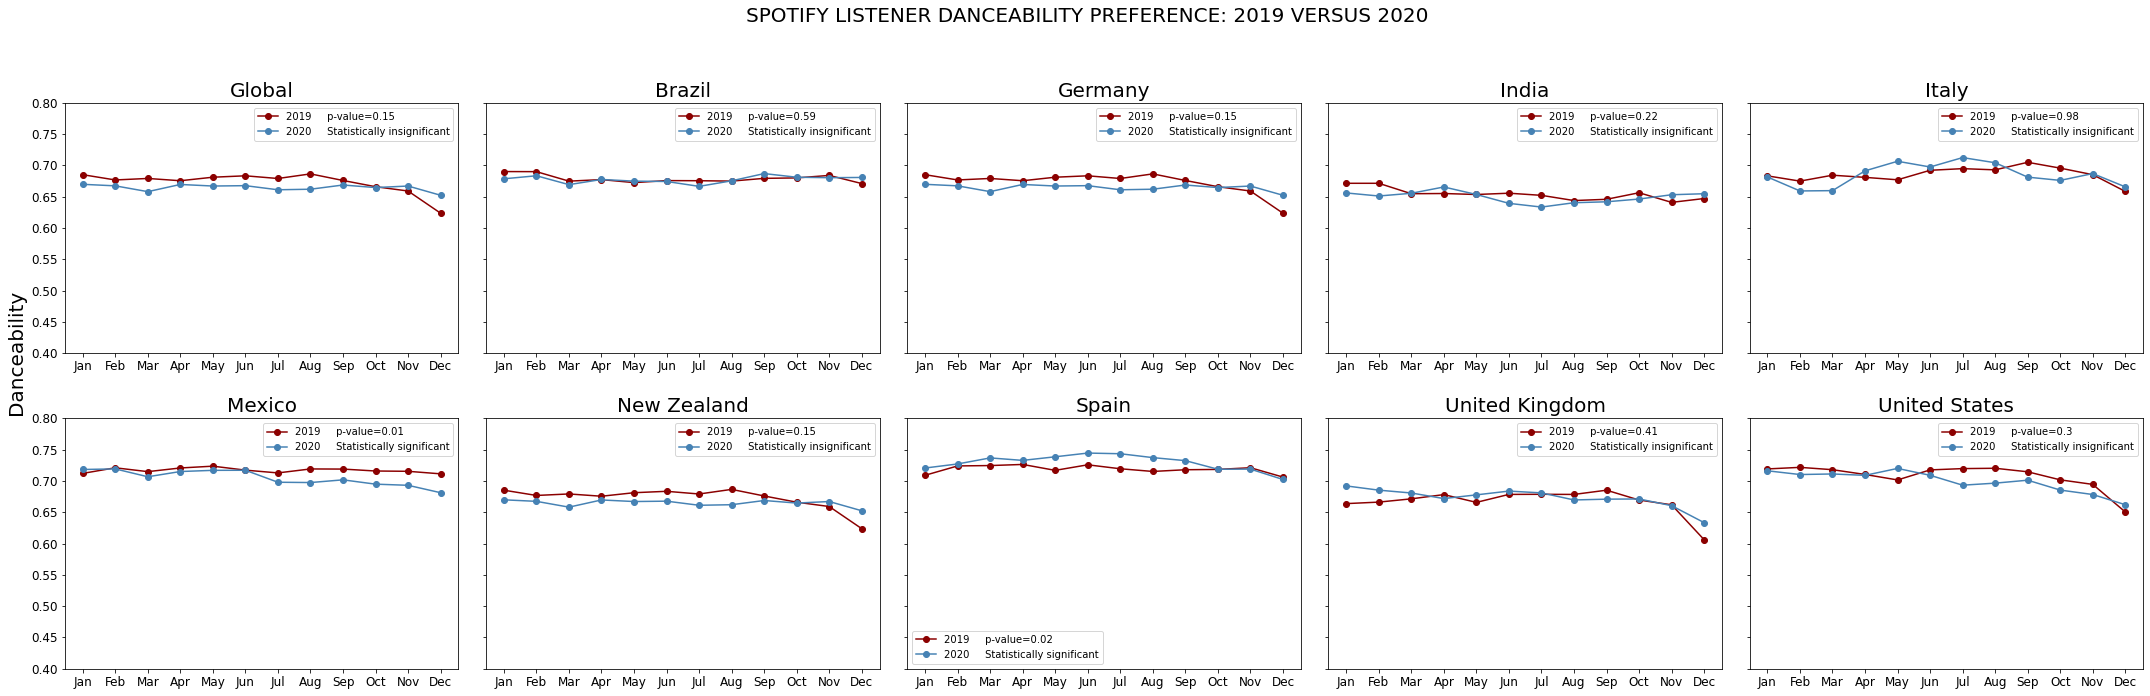

In [42]:
# Plot a comparison of 2019 2020 variable averages

variable_to_plot = 'Danceability'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):

    country_spotify_df = countries_spotify_df[countries_spotify_df['Country'] == countries_to_plot[i]]

    country_spotify_groupby = country_spotify_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()

    variable_2019 = country_spotify_groupby[country_spotify_groupby['Year'] == 2019]

    variable_2020 = country_spotify_groupby[country_spotify_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    



ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

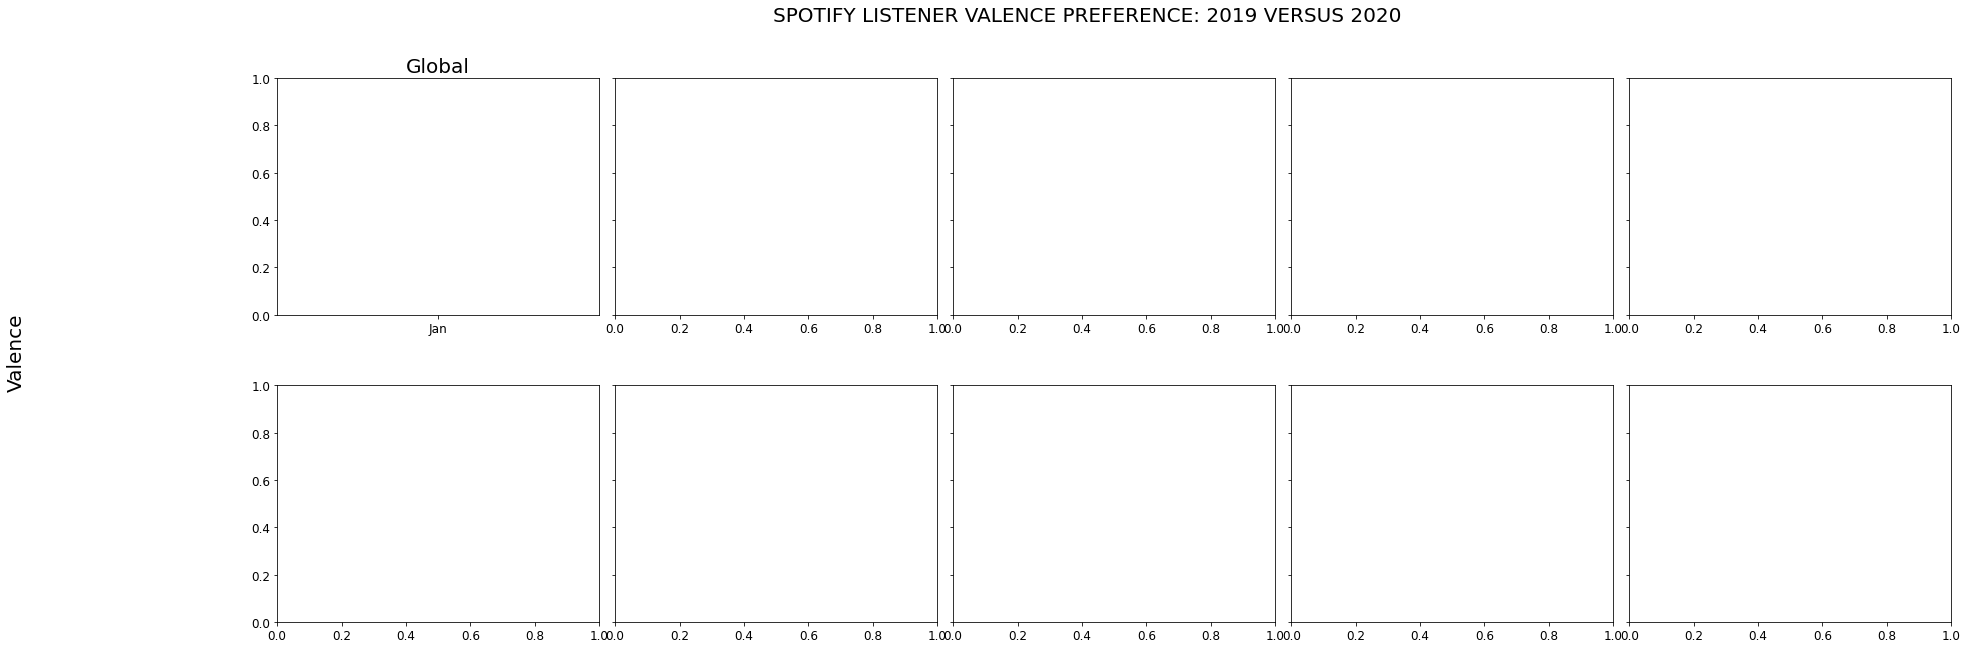

In [12]:
# Plot a comparison of 2019 2020 variable weighted averages

variable_to_plot = 'Valence'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):

    country_spotify_df = country_spotify_df[country_spotify_df['Country'] == countries_to_plot[i]]
    
    country_spotify_groupby = country_spotify_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].sum()

    variable_2019 = country_spotify_groupby[country_spotify_groupby['Year'] == 2019]

    variable_2020 = country_spotify_groupby[country_spotify_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    #plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

#fig.tight_layout(pad=2)   


#plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
#plt.show()
#variable_2019[variable_to_plot]    



In [28]:
# Covid data

covid_df = pd.read_csv("input_files/owid-covid-data.csv")                # read the covid data file
covid_df2 = covid_df.replace('World', 'Global')
covid_df2.head()
#covid_df2['location'].unique()
#covid_df2['date']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [29]:

countries_covid_df = covid_df2.loc[covid_df2['location'].isin(countries_to_plot)]  # Filter for country of your choice

countries_covid_df.to_csv("input_files/filtered_covid_data.csv")

countries_covid_df[['year']] = ''
countries_covid_df.head()
countries_covid_df['location'].unique()


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-29-aab9b3fc23fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_covid_df[['year']] = ''
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

array(['Brazil', 'Germany', 'India', 'Italy', 'Mexico', 'New Zealand',
       'Spain', 'United Kingdom', 'United States', 'Global'], dtype=object)

In [31]:
for index, row in countries_covid_df.iterrows():
    
    try:
        countries_covid_df.at[index, 'year'] = row['date'].split('-')[0]
        countries_covid_df.at[index, 'month'] = int(row['date'].split('-')[1]),0
    except: 
        countries_covid_df.at[index, 'year'] = np.nan
        countries_covid_df.at[index, 'month'] = np.nan

countries_covid_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,month
10813,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10814,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10815,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10816,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10817,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,3.0


In [35]:
countries_covid_2020_df = countries_covid_df.loc[countries_covid_df['year'] == '2020']
countries_covid_2020_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,month
10813,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10814,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10815,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10816,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,2.0
10817,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2020,3.0


In [41]:
# Scatter plot comparison of 2020 data and covid variables

country_populations = [7674000000, 211000000, 84000000, 1366000000, 60000000, 127000000, 4917000, 47000000, 66650000, 328000000]

variable_to_plot = 'Valence'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE VERSIS NEW COVID CASES\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         #va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         #linespacing = 2)  

# Set up lists to plot
   
for i in range(10):

    #ORGANIZAING SPOTIFY DATA
    country_spotify_df = countries_spotify_df[countries_spotify_df['Country'] == countries_to_plot[i]]

    country_spotify_groupby = country_spotify_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()


    variable_2020 = country_spotify_groupby[country_spotify_groupby['Year'] == 2020]
    
    #ORGANIZING COVID DATA
    country_covid_df = countries_covid_2020_df[countries_covid_2020_df['location'] == countries_to_plot[i]]
    
    country_covid_groupby = country_covid_df.groupby(['month'], as_index=False)['new_cases'].sum()

    if len(country_covid_groupby) == 11:

        country_covid_groupby.loc[-1] = [1, 0]             # This adds a 1 (month of January) in the first columne 
                                                         # index 0), in the last row of the dataframe. 

        country_covid_groupby.index = country_covid_groupby.index + 1   # shifts the index
    
    country_covid_groupby = country_covid_groupby.sort_index()      # sorts by index

    country_covid_groupby = country_covid_groupby.rename(columns={"new_cases": "New Cases", "month" : "Month"})
    
    #MERGING SPOTIFY WITH COVIDE DATA INTO ONE NICE DATAFRAME TO PLOT
    country_covid_vs_spotify_df= pd.merge(variable_2020, country_covid_groupby, on="Month")

    country_covid_vs_spotify_df['New Cases Per Million'] = country_covid_vs_spotify_df['New Cases'] / country_populations[i] *1000000

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',       # Set up shared x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
    
    fig, ax100 = plt.subplots()                   # Set up subplot figure and size  figsize=(12,8)
    fig.suptitle('ITALY')
    ax100.set_ylabel('Average Valence Scores')                  # Set up first plot 
    ax100.set_ylim([.2, .8])

    ax100_ydata = variable_2020
    plot_list[i].plot(months, ax100_ydata, label="Valence Scores", marker='o', color='darkred')                       

    ax2 = ax1.twinx()                                         # Set up second plot 
    ax2.set_ylabel('New Cases Per Month')
    ax2_ydata = country_covid_valence_df['New Cases Per Million']
    ax2.set_ylim([0, ax2_ydata.max()+20])
    ax2.plot(months, ax2_ydata, label="New Covid Cases Per Million", marker='o', color='steelblue')


    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

#variable_2020
#country_covid_groupby
country_covid_vs_spotify_df
    
  


,Year,Month,Valence,New Cases,New Cases Per Million
0,2020,1,0.456364,7.0,0.021341
1,2020,2,0.475727,17.0,0.051829
2,2020,3,0.485982,192276.0,586.207317
3,2020,4,0.478479,888719.0,2709.509146
4,2020,5,0.481987,717698.0,2188.103659
5,2020,6,0.494154,843456.0,2571.512195
6,2020,7,0.464861,1925246.0,5869.652439
7,2020,8,0.448920,1459475.0,4449.618902
8,2020,9,0.473001,1208533.0,3684.551829
9,2020,10,0.473082,1930191.0,5884.728659


In [32]:
  #print (countries_to_plot[i], country_groupby)

    variable_2019 = country_groupby[country_groupby['Year'] == 2019]

    variable_2020 = country_groupby[country_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    


IndentationError: unexpected indent (<ipython-input-32-b2daa282e78c>, line 3)